# **Feature engineering based intelligent intrusion detection system for IoT network security**
## **(Machine Learning Phase)**
### - *Dakshnamoorthy A | Giridhar Aditya R | Haritha R*

## **Introduction & Dataset Loading**

### Install all Required Libraries

In [36]:
%pip install -r requirements.txt

Note: you may need to restart the kernel to use updated packages.


### Merging 4 Dataset into Final Raw Dataset

In [ ]:
import pandas as pd

# Load features file (ISO-8859-1 used since UTF-8 caused decoding errors)
features = pd.read_csv("UNSW-NB15_features.csv", encoding="ISO-8859-1")
cols = features["Name"].tolist()

files = ["UNSW-NB15_1.csv","UNSW-NB15_2.csv","UNSW-NB15_3.csv","UNSW-NB15_4.csv"]
dfs = [pd.read_csv(f, header=None, names=cols, skiprows=1, low_memory=False) for f in files]
merged = pd.concat(dfs, ignore_index=True)
merged.to_csv("UNSW-NB15_FULL.csv", index=False)

print("Merged dataset shape:", merged.shape)
print("Total features:", len(cols))

Merged dataset shape: (2540043, 49)
Total features: 49


### Exploratory Data Analysis

DATASET OVERVIEW

Shape: (2540043, 49)
Records: 2,540,043
Features: 49
Duplicates: 480,630
Memory: 1908.94 MB

FIRST 5 ROWS


,srcip,sport,dstip,dsport,proto,state,dur,sbytes,dbytes,sttl,...,ct_ftp_cmd,ct_srv_src,ct_srv_dst,ct_dst_ltm,ct_src_ ltm,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,attack_cat,Label
0,59.166.0.0,33661,149.171.126.9,1024,udp,CON,0.036133,528,304,31,...,0,2,4,2,3,1,1,2,NaN,0
1,59.166.0.6,1464,149.171.126.7,53,udp,CON,0.001119,146,178,31,...,0,12,8,1,2,2,1,1,NaN,0
2,59.166.0.5,3593,149.171.126.5,53,udp,CON,0.001209,132,164,31,...,0,6,9,1,1,1,1,1,NaN,0
3,59.166.0.3,49664,149.171.126.0,53,udp,CON,0.001169,146,178,31,...,0,7,9,1,1,1,1,1,NaN,0
4,59.166.0.0,32119,149.171.126.9,111,udp,CON,0.078339,568,312,31,...,0,2,4,2,3,1,1,2,NaN,0



DATA TYPES


int64      28
float64    12
object      9
Name: count, dtype: int64


MISSING VALUES
Total Missing: 4,996,780

Features with Missing Values:
  attack_cat               :  2,218,760 (87.35%)
  is_ftp_login             :  1,429,877 (56.29%)
  ct_flw_http_mthd         :  1,348,143 (53.08%)

ATTACK CATEGORY DISTRIBUTION
Normal                   :  2,218,760 (87.35%)
Generic                  :    215,481 ( 8.48%)
Exploits                 :     44,525 ( 1.75%)
 Fuzzers                 :     19,195 ( 0.76%)
DoS                      :     16,353 ( 0.64%)
 Reconnaissance          :     12,228 ( 0.48%)
 Fuzzers                 :      5,051 ( 0.20%)
Analysis                 :      2,677 ( 0.11%)
Backdoor                 :      1,795 ( 0.07%)
Reconnaissance           :      1,759 ( 0.07%)
 Shellcode               :      1,288 ( 0.05%)
Backdoors                :        534 ( 0.02%)
Shellcode                :        223 ( 0.01%)
Worms                    :        174 ( 0.01%)


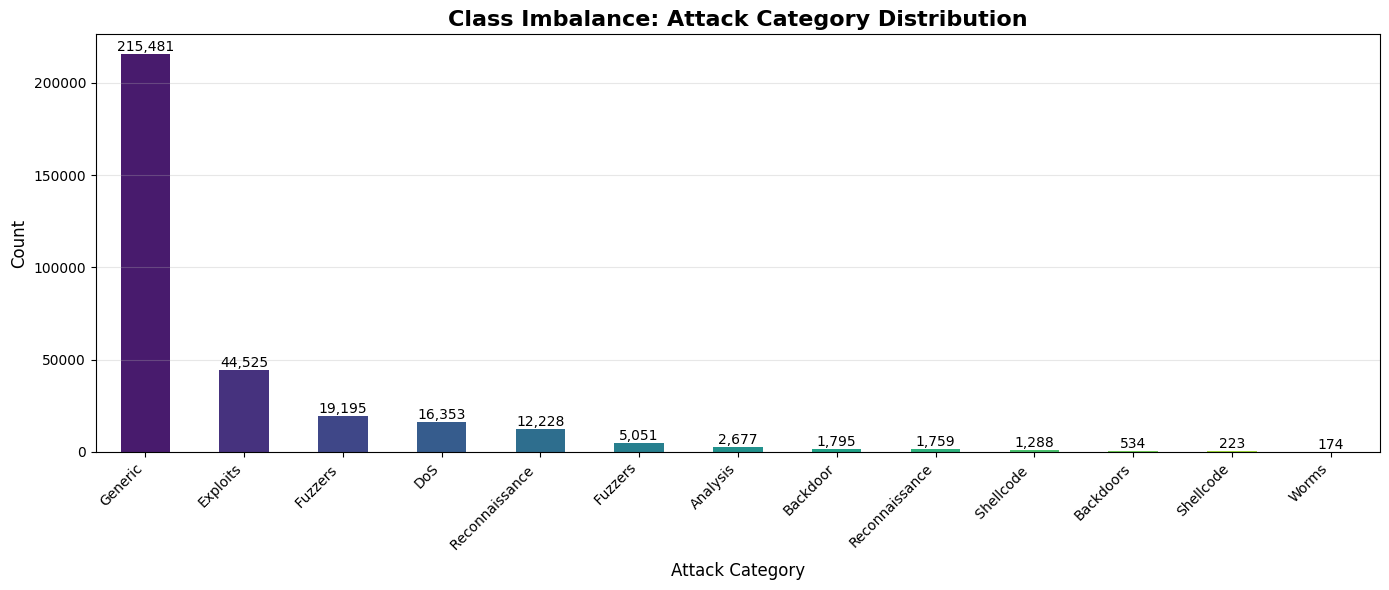

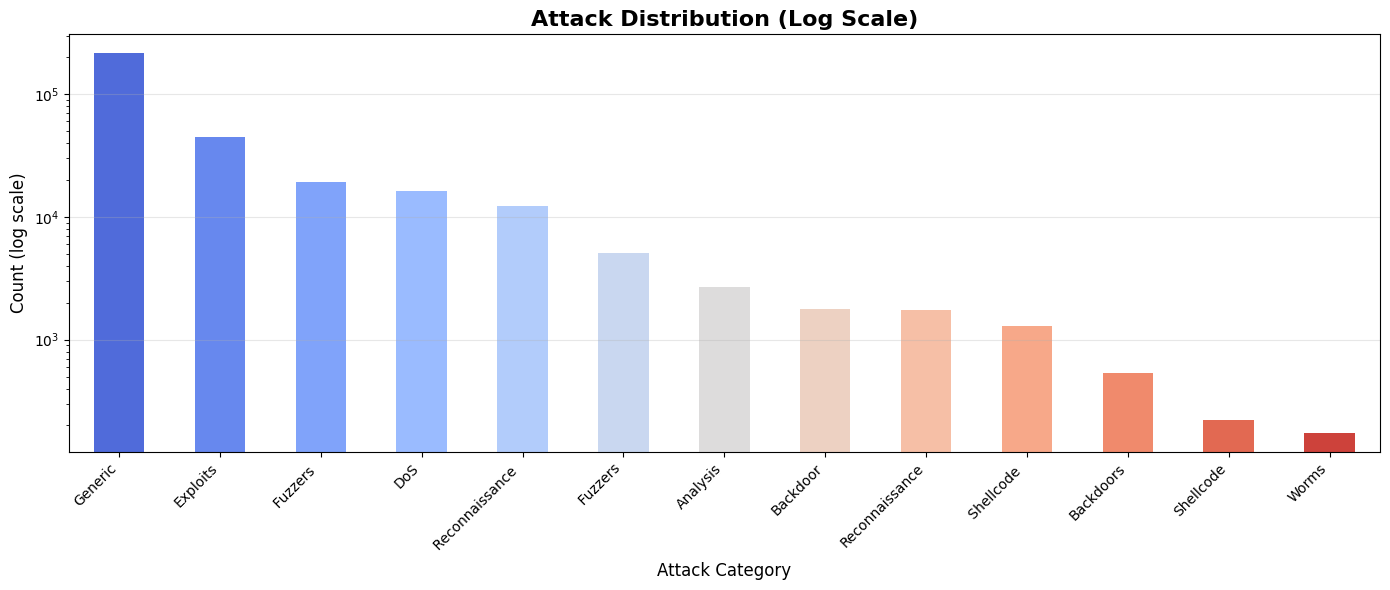


STATISTICAL SUMMARY


,dur,sbytes,dbytes,sttl,dttl,sloss,dloss,Sload,Dload,Spkts,...,ct_flw_http_mthd,is_ftp_login,ct_srv_src,ct_srv_dst,ct_dst_ltm,ct_src_ ltm,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,Label
count,2.540043e+06,2.540043e+06,2.540043e+06,2.540043e+06,2.540043e+06,2.540043e+06,2.540043e+06,2.540043e+06,2.540043e+06,2.540043e+06,...,1.191900e+06,1.110166e+06,2.540043e+06,2.540043e+06,2.540043e+06,2.540043e+06,2.540043e+06,2.540043e+06,2.540043e+06,2.540043e+06
mean,6.587925e-01,4.339589e+03,3.642760e+04,6.278202e+01,3.076681e+01,5.163917e+00,1.632944e+01,3.695650e+07,2.450860e+06,3.328882e+01,...,2.345860e-01,3.969947e-02,9.206993e+00,8.988962e+00,6.439107e+00,6.900989e+00,4.642145e+00,3.592733e+00,6.845894e+00,1.264872e-01
std,1.392494e+01,5.640604e+04,1.610962e+05,7.462281e+01,4.285092e+01,2.251709e+01,5.659479e+01,1.186044e+08,4.224865e+06,7.628393e+01,...,7.940930e-01,1.996591e-01,1.083676e+01,1.082250e+01,8.162039e+00,8.205068e+00,8.477584e+00,6.174449e+00,1.125829e+01,3.323977e-01
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00
25%,1.037000e-03,2.000000e+02,1.780000e+02,3.100000e+01,2.900000e+01,0.000000e+00,0.000000e+00,1.353955e+05,1.191580e+04,2.000000e+00,...,0.000000e+00,0.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00
50%,1.586100e-02,1.470000e+03,1.820000e+03,3.100000e+01,2.900000e+01,3.000000e+00,4.000000e+00,5.893038e+05,5.893179e+05,1.200000e+01,...,0.000000e+00,0.000000e+00,5.000000e+00,5.000000e+00,3.000000e+00,4.000000e+00,1.000000e+00,1.000000e+00,2.000000e+00,0.000000e+00
75%,2.145650e-01,3.182000e+03,1.489400e+04,3.100000e+01,2.900000e+01,7.000000e+00,1.400000e+01,2.039923e+06,2.925945e+06,4.400000e+01,...,0.000000e+00,0.000000e+00,1.000000e+01,1.000000e+01,6.000000e+00,7.000000e+00,2.000000e+00,1.000000e+00,5.000000e+00,0.000000e+00
max,8.786638e+03,1.435577e+07,1.465753e+07,2.550000e+02,2.540000e+02,5.319000e+03,5.507000e+03,5.988000e+09,1.287619e+08,1.064600e+04,...,3.600000e+01,4.000000e+00,6.700000e+01,6.700000e+01,6.700000e+01,6.700000e+01,6.700000e+01,6.000000e+01,6.700000e+01,1.000000e+00


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the merged dataset
df = pd.read_csv("UNSW-NB15_FULL.csv", low_memory=False)

print("="*80)
print("DATASET OVERVIEW")
print("="*80)
print(f"\nShape: {df.shape}")
print(f"Records: {len(df):,}")
print(f"Features: {df.shape[1]}")
print(f"Duplicates: {df.duplicated().sum():,}")
print(f"Memory: {df.memory_usage(deep=True).sum() / 1024**2:.2f} MB")

print("\n" + "="*80)
print("FIRST 5 ROWS")
print("="*80)
display(df.head())

print("\n" + "="*80)
print("DATA TYPES")
print("="*80)
display(df.dtypes.value_counts())

print("\n" + "="*80)
print("MISSING VALUES")
print("="*80)
missing_total = df.isnull().sum().sum()
print(f"Total Missing: {missing_total:,}")
if missing_total > 0:
    missing_by_col = df.isnull().sum()[df.isnull().sum() > 0].sort_values(ascending=False)
    print("\nFeatures with Missing Values:")
    for col, count in missing_by_col.items():
        pct = (count / len(df)) * 100
        print(f"  {col:<25}: {count:>10,} ({pct:>5.2f}%)")

print("\n" + "="*80)
print("ATTACK CATEGORY DISTRIBUTION")
print("="*80)
attack_counts = df['attack_cat'].value_counts()
total_attacks = attack_counts.sum()
normal_count = len(df) - total_attacks
print(f"{'Normal':<25}: {normal_count:>10,} ({normal_count/len(df)*100:>5.2f}%)")
for category, count in attack_counts.items():
    pct = (count / len(df)) * 100
    print(f"{str(category):<25}: {count:>10,} ({pct:>5.2f}%)")

# Visualization 1: Class Imbalance Bar Chart
plt.figure(figsize=(14, 6))
attack_counts.plot(kind='bar', color=sns.color_palette("viridis", len(attack_counts)))
plt.title('Class Imbalance: Attack Category Distribution', fontsize=16, fontweight='bold')
plt.xlabel('Attack Category', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', alpha=0.3)
for i, v in enumerate(attack_counts.values):
    plt.text(i, v, f'{v:,}', ha='center', va='bottom', fontsize=10)
plt.tight_layout()
plt.show()

# Visualization 2: Log Scale Distribution
plt.figure(figsize=(14, 6))
attack_counts.plot(kind='bar', logy=True, color=sns.color_palette("coolwarm", len(attack_counts)))
plt.title('Attack Distribution (Log Scale)', fontsize=16, fontweight='bold')
plt.xlabel('Attack Category', fontsize=12)
plt.ylabel('Count (log scale)', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

print("\n" + "="*80)
print("STATISTICAL SUMMARY")
print("="*80)
display(df.describe())


## **Data Preprocessing**

### Load Dataset

In [ ]:
# Load Dataset
import pandas as pd
df = pd.read_csv("UNSW-NB15_FULL.csv", low_memory=False)
print(f"Original shape: {df.shape}")
print(f"Total records: {len(df):,}")

Original shape: (2540043, 49)
Total records: 2,540,043


### Handling Missing Values

In [ ]:
#Handling Missing Values
df = df.fillna(0)
print(f"Missing values: {df.isna().sum().sum()}")

Missing values: 0


### Shuffling Data

In [ ]:
# Shuffling Data
df = df.sample(frac=1, random_state=42).reset_index(drop=True)
print("Data shuffled successfully")

Data shuffled successfully


### Cleaning Attack Category Labels

In [ ]:
# Cleaning Attack Category Labels
df['attack_cat'] = df['attack_cat'].astype(str).str.strip()
df['attack_cat'] = df['attack_cat'].replace({
    'nan': 'Normal',
    'Backdoors': 'Backdoor',
})

print("Unique categories after cleaning:")
print(df['attack_cat'].value_counts())

Unique categories after cleaning:
attack_cat
0                 2218760
Generic            215481
Exploits            44525
Fuzzers             24246
DoS                 16353
Reconnaissance      13987
Analysis             2677
Backdoor             2329
Shellcode            1511
Worms                 174
Name: count, dtype: int64


### Encoding Attack Categories

In [ ]:
# Encoding Attack Categories
attack_map = {
    'Normal': 0, 'Exploits': 1, 'Reconnaissance': 2, 'DoS': 3, 'Generic': 4,
    'Shellcode': 5, 'Fuzzers': 6, 'Worms': 7, 'Backdoor': 8, 'Analysis': 9
}

df['attack_cat'] = df['attack_cat'].map(attack_map)
df['attack_cat'] = df['attack_cat'].fillna(0).astype(int)

print("Class distribution:")
for i in range(10):
    count = (df['attack_cat'] == i).sum()
    class_name = [k for k, v in attack_map.items() if v == i][0]
    print(f"Class {i} ({class_name:15s}): {count:7,} ({count/len(df)*100:.2f}%)")


Class distribution:
Class 0 (Normal         ): 2,218,760 (87.35%)
Class 1 (Exploits       ):  44,525 (1.75%)
Class 2 (Reconnaissance ):  13,987 (0.55%)
Class 3 (DoS            ):  16,353 (0.64%)
Class 4 (Generic        ): 215,481 (8.48%)
Class 5 (Shellcode      ):   1,511 (0.06%)
Class 6 (Fuzzers        ):  24,246 (0.95%)
Class 7 (Worms          ):     174 (0.01%)
Class 8 (Backdoor       ):   2,329 (0.09%)
Class 9 (Analysis       ):   2,677 (0.11%)


### Creating Binary Labels

In [ ]:
# Creating Binary Labels
df['binary_label'] = (df['attack_cat'] > 0).astype(int)
normal_count = (df['binary_label'] == 0).sum()
attack_count = (df['binary_label'] == 1).sum()

print(f"Normal (0): {normal_count:,} ({normal_count/len(df)*100:.2f}%)")
print(f"Attack (1): {attack_count:,} ({attack_count/len(df)*100:.2f}%)")

Normal (0): 2,218,760 (87.35%)
Attack (1): 321,283 (12.65%)


### Encoding Categorical Features

In [ ]:
# Encoding Categorical Features
from sklearn.preprocessing import LabelEncoder
cat_cols = df.select_dtypes(include=['object']).columns.tolist()
cat_cols = [c for c in cat_cols if c not in ['attack_cat', 'binary_label']]

for col in cat_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col].astype(str))
    print(f"Encoded: {col}")

Encoded: srcip
Encoded: sport
Encoded: dstip
Encoded: dsport
Encoded: proto
Encoded: state
Encoded: service
Encoded: ct_ftp_cmd


### Train-Test Split (80-20)

In [ ]:
# Train-Test Split (80-20)
from sklearn.model_selection import train_test_split
train_df, test_df = train_test_split(
    df, test_size=0.2, random_state=42, stratify=df['attack_cat']
)
print(f"Train shape: {train_df.shape} ({len(train_df):,} records)")
print(f"Test shape: {test_df.shape} ({len(test_df):,} records)")


Train shape: (2032034, 50) (2,032,034 records)
Test shape: (508009, 50) (508,009 records)


### Normalizing Features

In [ ]:
# Normalizing Features
from sklearn.preprocessing import MinMaxScaler

exclude = ['attack_cat', 'binary_label', 'Label', 'label']
num_cols = [c for c in train_df.columns if c not in exclude]

scaler = MinMaxScaler()
train_df[num_cols] = scaler.fit_transform(train_df[num_cols])
test_df[num_cols] = scaler.transform(test_df[num_cols])

print(f"Normalized {len(num_cols)} features to [0, 1] range")

Normalized 47 features to [0, 1] range


### Saving the Preprocessed Train and Test Datasets

In [ ]:
# Saving the Preprocessed Train and Test Datasets
train_df.to_csv("UNSW_FEIIDS_train.csv", index=False)
test_df.to_csv("UNSW_FEIIDS_test.csv", index=False)

print("Saved: UNSW_FEIIDS_train.csv")
print("Saved: UNSW_FEIIDS_test.csv")
print("\nPreprocessing complete. Ready for feature engineering.")

Saved: UNSW_FEIIDS_train.csv
Saved: UNSW_FEIIDS_test.csv

Preprocessing complete. Ready for feature engineering.


## **Feature Subset Creation**

### Imports and Setup

In [13]:
import pandas as pd
import numpy as np
from sklearn.feature_selection import chi2
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
import os

os.makedirs("models", exist_ok=True)
os.makedirs("visualizations", exist_ok=True)

### Load Data and Prepare for Chi-Square

In [14]:
print("\nLoading preprocessed training data...")

train_df = pd.read_csv("UNSW_FEIIDS_train.csv")

label_cols = ['attack_cat', 'binary_label', 'Label', 'label']
existing_labels = [col for col in label_cols if col in train_df.columns]

X_train = train_df.drop(existing_labels, axis=1)
y_train_multi = train_df['attack_cat']

print(f"Feature matrix shape: {X_train.shape}")
print(f"Total features: {X_train.shape[1]}")
print(f"Classes: {y_train_multi.nunique()}")

X_train = X_train.abs()

scaler = MinMaxScaler()
X_train_scaled = pd.DataFrame(
    scaler.fit_transform(X_train),
    columns=X_train.columns
)

print("Features normalized and ready for chi-square test")



Loading preprocessed training data...
Feature matrix shape: (2032034, 47)
Total features: 47
Classes: 10
Features normalized and ready for chi-square test


### Perform Chi-Square Feature Selection 

In [15]:
print("\nPerforming chi-square feature selection...")

K_FEATURES = 11
class_names = ['Normal', 'Exploits', 'Reconnaissance', 'DoS', 'Generic', 
               'Shellcode', 'Fuzzers', 'Worms', 'Backdoor', 'Analysis']

feature_subsets_computed = {}
chi2_scores_all = {}

for class_id in range(10):
    y_binary = (y_train_multi == class_id).astype(int)
    
    chi2_scores, p_values = chi2(X_train_scaled, y_binary)
    chi2_scores_all[class_id] = chi2_scores
    
    top_indices = np.argsort(chi2_scores)[-K_FEATURES:][::-1]
    feature_subsets_computed[class_id] = sorted(top_indices.tolist())

print(f"Chi-square feature selection completed for {len(feature_subsets_computed)} classes")


Performing chi-square feature selection...
Chi-square feature selection completed for 10 classes


### Feature Subsets 

In [16]:
print("\n" + "="*80)
print("Class-Specific Feature Subsets Selected Using Chi-Square Test")
print("="*80)
print()

for class_id in range(10):
    indices_1based = [idx + 1 for idx in feature_subsets_computed[class_id]]
    indices_str = ', '.join(map(str, indices_1based))
    print(f"{class_names[class_id]:<20s} {indices_str}")

print()
print("="*80)
print(f"Note: Feature indices are 1-based")
print(f"Total features: {X_train.shape[1]} | Selected per class: {K_FEATURES}")
print("="*80)



Class-Specific Feature Subsets Selected Using Chi-Square Test

Normal               10, 19, 20, 29, 30, 37, 41, 42, 45, 46, 47
Exploits             4, 10, 11, 29, 30, 33, 34, 35, 37, 41, 42
Reconnaissance       4, 10, 11, 24, 29, 30, 37, 41, 42, 43, 47
DoS                  2, 4, 10, 19, 20, 21, 22, 24, 29, 30, 37
Generic              10, 19, 20, 37, 41, 42, 43, 44, 45, 46, 47
Shellcode            10, 11, 14, 24, 29, 30, 37, 41, 42, 43, 47
Fuzzers              10, 11, 14, 24, 27, 29, 30, 33, 34, 35, 37
Worms                4, 10, 11, 14, 29, 30, 33, 34, 35, 37, 38
Backdoor             2, 4, 10, 14, 19, 20, 21, 22, 24, 30, 37
Analysis             2, 4, 10, 11, 19, 20, 21, 22, 24, 37, 38

Note: Feature indices are 1-based
Total features: 47 | Selected per class: 11


## **Feature Engineering**

### Imports and Setup

In [2]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.utils import resample
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import time
import pickle
import os
os.makedirs("models", exist_ok=True)

###  Load Data and Define Feature Subsets

In [3]:
train_df = pd.read_csv("UNSW_FEIIDS_train.csv")
test_df = pd.read_csv("UNSW_FEIIDS_test.csv")

X_train = train_df.drop(['attack_cat', 'binary_label'], axis=1)
y_train_multi = train_df['attack_cat']
y_train_binary = train_df['binary_label']

X_test = test_df.drop(['attack_cat', 'binary_label'], axis=1)
y_test_multi = test_df['attack_cat']
y_test_binary = test_df['binary_label']

print(f"Train shape: {X_train.shape}")
print(f"Test shape: {X_test.shape}")

feature_subsets_paper = {
    0: [11, 34, 19, 20, 21, 37, 6, 10, 11, 36, 47],
    1: [10, 41, 42, 6, 37, 46, 11, 19, 36, 5, 45],
    2: [10, 14, 37, 41, 42, 43, 44, 9, 16, 17, 28],
    3: [6, 11, 15, 16, 36, 37, 39, 40, 42, 44, 45],
    4: [6, 9, 10, 11, 12, 13, 15, 16, 17, 18, 20],
    5: [6, 9, 10, 12, 13, 14, 15, 16, 17, 18, 23],
    6: [6, 11, 14, 15, 16, 36, 37, 39, 40, 41, 42],
    7: [41, 37, 9, 11, 10, 46, 23, 17, 14, 5, 13],
    8: [6, 10, 11, 14, 15, 16, 37, 41, 42, 44, 45],
    9: [6, 10, 11, 12, 13, 14, 15, 16, 34, 35, 37]
}

feature_subsets_paper = {
    0: [10, 19, 20, 29, 30, 37, 41, 42, 45, 46, 47],   # Normal
    1: [4, 10, 11, 29, 30, 33, 34, 35, 37, 41, 42],    # Exploits
    2: [4, 10, 11, 24, 29, 30, 37, 41, 42, 43, 47],    # Reconnaissance
    3: [2, 4, 10, 19, 20, 21, 22, 24, 29, 30, 37],     # DoS
    4: [10, 19, 20, 37, 41, 42, 43, 44, 45, 46, 47],   # Generic
    5: [10, 11, 14, 24, 29, 30, 37, 41, 42, 43, 47],   # Shellcode
    6: [10, 11, 14, 24, 27, 29, 30, 33, 34, 35, 37],   # Fuzzers
    7: [4, 10, 11, 14, 29, 30, 33, 34, 35, 37, 38],    # Worms
    8: [2, 4, 10, 14, 19, 20, 21, 22, 24, 30, 37],     # Backdoor
    9: [2, 4, 10, 11, 19, 20, 21, 22, 24, 37, 38]      # Analysis
}

feature_subsets = {}
max_feature_idx = X_train.shape[1] - 1

for class_id, indices in feature_subsets_paper.items():
    feature_subsets[class_id] = [min(idx - 1, max_feature_idx) for idx in indices]
    feature_subsets[class_id] = list(dict.fromkeys(feature_subsets[class_id]))

print(f"Feature subsets defined for 10 classes")


Train shape: (2032034, 48)
Test shape: (508009, 48)
Feature subsets defined for 10 classes


### Train Multiclass LR Models with Balanced Sampling

In [4]:
MIN_THRESHOLD = 5000
regression_models_multi = {}
sampling_stats = []
class_names = ['Normal', 'Exploits', 'Reconnaissance', 'DoS', 'Generic', 
               'Shellcode', 'Fuzzers', 'Worms', 'Backdoor', 'Analysis']

start_time = time.time()

for class_id in range(10):
    print(f"\nTraining Class {class_id}: {class_names[class_id]}")
    
    feature_indices = feature_subsets[class_id]
    X_subset = X_train.iloc[:, feature_indices].copy()
    y_binary = (y_train_multi == class_id).astype(int)
    
    positive_count = y_binary.sum()
    negative_count = len(y_binary) - positive_count
    
    print(f"  Original - Positive: {positive_count:,}, Negative: {negative_count:,}")
    
    positive_indices = y_binary[y_binary == 1].index
    negative_indices = y_binary[y_binary == 0].index
    
    X_pos = X_subset.loc[positive_indices]
    y_pos = y_binary.loc[positive_indices]
    X_neg = X_subset.loc[negative_indices]
    y_neg = y_binary.loc[negative_indices]
    
    if positive_count < MIN_THRESHOLD:
        X_pos_resampled, y_pos_resampled = resample(
            X_pos, y_pos, n_samples=MIN_THRESHOLD, replace=True, random_state=42
        )
        target_neg = MIN_THRESHOLD
        X_neg_resampled, y_neg_resampled = resample(
            X_neg, y_neg, n_samples=target_neg, replace=False, random_state=42
        )
        strategy = "Oversample positive + Undersample negative"
    elif positive_count > negative_count:
        target_pos = min(positive_count, 50000)
        target_neg = target_pos
        X_pos_resampled, y_pos_resampled = resample(
            X_pos, y_pos, n_samples=target_pos, replace=False, random_state=42
        )
        X_neg_resampled, y_neg_resampled = resample(
            X_neg, y_neg, n_samples=target_neg, replace=False, random_state=42
        )
        strategy = "Undersample both"
    else:
        target_neg = positive_count
        X_neg_resampled, y_neg_resampled = resample(
            X_neg, y_neg, n_samples=target_neg, replace=False, random_state=42
        )
        X_pos_resampled = X_pos
        y_pos_resampled = y_pos
        strategy = "Undersample negative"
    
    X_balanced = pd.concat([X_pos_resampled, X_neg_resampled], axis=0)
    y_balanced = pd.concat([y_pos_resampled, y_neg_resampled], axis=0)
    
    shuffle_idx = np.random.permutation(len(X_balanced))
    X_balanced = X_balanced.iloc[shuffle_idx].reset_index(drop=True)
    y_balanced = y_balanced.iloc[shuffle_idx].reset_index(drop=True)
    
    print(f"  Balanced - Total: {len(X_balanced):,}, Strategy: {strategy}")
    
    model = LinearRegression()
    model.fit(X_balanced, y_balanced)
    
    r2_score = model.score(X_balanced, y_balanced)
    y_pred_train = model.predict(X_balanced)
    y_pred_train_binary = (y_pred_train >= 0.5).astype(int)
    train_accuracy = accuracy_score(y_balanced, y_pred_train_binary)
    
    print(f"  R² Score: {r2_score:.4f}, Accuracy: {train_accuracy:.4f}")
    
    regression_models_multi[class_id] = {
        'model': model,
        'features': feature_indices,
        'class_name': class_names[class_id]
    }
    
    model_filename = f"models/lr_model_class_{class_id}_{class_names[class_id]}.pkl"
    with open(model_filename, 'wb') as f:
        pickle.dump({
            'model': model,
            'features': feature_indices,
            'class_id': class_id,
            'class_name': class_names[class_id],
            'r2_score': r2_score,
            'accuracy': train_accuracy
        }, f)
    
    sampling_stats.append({
        'Class': class_id,
        'Name': class_names[class_id],
        'Original_Positive': positive_count,
        'Original_Negative': negative_count,
        'Strategy': strategy,
        'Final_Total': len(X_balanced),
        'R2_Score': r2_score,
        'Accuracy': train_accuracy
    })

training_time = time.time() - start_time
print(f"\nTotal training time: {training_time:.2f}s")

stats_df = pd.DataFrame(sampling_stats)
stats_df.to_csv("models/training_summary_multiclass.csv", index=False)
print("\nSummary:")
print(stats_df.to_string(index=False))


Training Class 0: Normal
  Original - Positive: 1,775,008, Negative: 257,026
  Balanced - Total: 100,000, Strategy: Undersample both
  R² Score: 0.9037, Accuracy: 0.9568

Training Class 1: Exploits
  Original - Positive: 35,620, Negative: 1,996,414
  Balanced - Total: 71,240, Strategy: Undersample negative
  R² Score: 0.7974, Accuracy: 0.9650

Training Class 2: Reconnaissance
  Original - Positive: 11,189, Negative: 2,020,845
  Balanced - Total: 22,378, Strategy: Undersample negative
  R² Score: 0.8573, Accuracy: 0.9642

Training Class 3: DoS
  Original - Positive: 13,082, Negative: 2,018,952
  Balanced - Total: 26,164, Strategy: Undersample negative
  R² Score: 0.6705, Accuracy: 0.8776

Training Class 4: Generic
  Original - Positive: 172,385, Negative: 1,859,649
  Balanced - Total: 344,770, Strategy: Undersample negative
  R² Score: 0.9165, Accuracy: 0.9710

Training Class 5: Shellcode
  Original - Positive: 1,209, Negative: 2,030,825
  Balanced - Total: 10,000, Strategy: Oversample

### Train Binary LR Models

In [20]:
regression_models_binary = {}
binary_stats = []
BINARY_SAMPLE_SIZE = 50000

start_time = time.time()

for binary_class_id, binary_name in enumerate(['Normal', 'Attack']):
    print(f"\nTraining Binary Model {binary_class_id}: {binary_name}")
    
    feature_indices = feature_subsets[0] if binary_class_id == 0 else feature_subsets[1]
    X_subset = X_train.iloc[:, feature_indices]
    y_binary_target = (y_train_binary == binary_class_id).astype(int)
    
    pos_idx = y_binary_target[y_binary_target == 1].index
    neg_idx = y_binary_target[y_binary_target == 0].index
    
    print(f"  Original - Positive: {len(pos_idx):,}, Negative: {len(neg_idx):,}")
    
    X_pos_sample, y_pos_sample = resample(
        X_subset.loc[pos_idx], y_binary_target.loc[pos_idx],
        n_samples=BINARY_SAMPLE_SIZE, replace=False, random_state=42
    )
    X_neg_sample, y_neg_sample = resample(
        X_subset.loc[neg_idx], y_binary_target.loc[neg_idx],
        n_samples=BINARY_SAMPLE_SIZE, replace=False, random_state=42
    )
    
    X_binary_balanced = pd.concat([X_pos_sample, X_neg_sample])
    y_binary_balanced = pd.concat([y_pos_sample, y_neg_sample])
    
    shuffle_idx = np.random.permutation(len(X_binary_balanced))
    X_binary_balanced = X_binary_balanced.iloc[shuffle_idx].reset_index(drop=True)
    y_binary_balanced = y_binary_balanced.iloc[shuffle_idx].reset_index(drop=True)
    
    print(f"  Balanced - Total: {len(X_binary_balanced):,}")
    
    model = LinearRegression()
    model.fit(X_binary_balanced, y_binary_balanced)
    
    r2_score = model.score(X_binary_balanced, y_binary_balanced)
    y_pred = model.predict(X_binary_balanced)
    y_pred_binary = (y_pred >= 0.5).astype(int)
    accuracy = accuracy_score(y_binary_balanced, y_pred_binary)
    
    print(f"  R² Score: {r2_score:.4f}, Accuracy: {accuracy:.4f}")
    
    regression_models_binary[binary_class_id] = {
        'model': model,
        'features': feature_indices
    }
    
    model_filename = f"models/lr_model_binary_{binary_class_id}_{binary_name}.pkl"
    with open(model_filename, 'wb') as f:
        pickle.dump({
            'model': model,
            'features': feature_indices,
            'class_id': binary_class_id,
            'class_name': binary_name,
            'r2_score': r2_score,
            'accuracy': accuracy
        }, f)
    
    binary_stats.append({
        'Class': binary_class_id,
        'Name': binary_name,
        'Final_Total': len(X_binary_balanced),
        'R2_Score': r2_score,
        'Accuracy': accuracy
    })

binary_training_time = time.time() - start_time

binary_stats_df = pd.DataFrame(binary_stats)
binary_stats_df.to_csv("models/training_summary_binary.csv", index=False)
print("\nBinary Summary:")
print(binary_stats_df.to_string(index=False))


Training Binary Model 0: Normal
  Original - Positive: 1,775,008, Negative: 257,026
  Balanced - Total: 100,000
  R² Score: 0.9037, Accuracy: 0.9568

Training Binary Model 1: Attack
  Original - Positive: 257,026, Negative: 1,775,008
  Balanced - Total: 100,000
  R² Score: 0.9282, Accuracy: 0.9902

Binary Summary:
 Class   Name  Final_Total  R2_Score  Accuracy
     0 Normal       100000  0.903663   0.95684
     1 Attack       100000  0.928225   0.99019


### Generate Engineered Features

In [21]:
def generate_engineered_features(X, regression_models):
    engineered_features = []
    for class_id in sorted(regression_models.keys()):
        model_info = regression_models[class_id]
        model = model_info['model']
        feature_indices = model_info['features']
        X_subset = X.iloc[:, feature_indices]
        scores = model.predict(X_subset)
        scores = np.clip(scores, 0, 1)
        engineered_features.append(scores)
    X_engineered = np.column_stack(engineered_features)
    return X_engineered

print("Generating multiclass features...")
X_train_engineered_multi = generate_engineered_features(X_train, regression_models_multi)
X_test_engineered_multi = generate_engineered_features(X_test, regression_models_multi)

print(f"  Train: {X_train_engineered_multi.shape}")
print(f"  Test: {X_test_engineered_multi.shape}")

print("\nGenerating binary features...")
X_train_engineered_binary = generate_engineered_features(X_train, regression_models_binary)
X_test_engineered_binary = generate_engineered_features(X_test, regression_models_binary)

print(f"  Train: {X_train_engineered_binary.shape}")
print(f"  Test: {X_test_engineered_binary.shape}")

Generating multiclass features...
  Train: (2032034, 10)
  Test: (508009, 10)

Generating binary features...
  Train: (2032034, 2)
  Test: (508009, 2)


### Save Engineered Datasets

In [22]:
pd.DataFrame(X_train_engineered_multi, 
             columns=[f'LR_Class_{i}' for i in range(10)]).to_csv(
    "UNSW_FEIIDS_train_engineered_multiclass.csv", index=False)

pd.DataFrame(X_test_engineered_multi, 
             columns=[f'LR_Class_{i}' for i in range(10)]).to_csv(
    "UNSW_FEIIDS_test_engineered_multiclass.csv", index=False)

pd.DataFrame(X_train_engineered_binary, 
             columns=['LR_Normal', 'LR_Attack']).to_csv(
    "UNSW_FEIIDS_train_engineered_binary.csv", index=False)

pd.DataFrame(X_test_engineered_binary, 
             columns=['LR_Normal', 'LR_Attack']).to_csv(
    "UNSW_FEIIDS_test_engineered_binary.csv", index=False)

pd.DataFrame({'attack_cat': y_train_multi, 
              'binary_label': y_train_binary}).to_csv(
    "UNSW_FEIIDS_train_labels.csv", index=False)

pd.DataFrame({'attack_cat': y_test_multi, 
              'binary_label': y_test_binary}).to_csv(
    "UNSW_FEIIDS_test_labels.csv", index=False)

print("Saved:")
print("  - UNSW_FEIIDS_train_engineered_multiclass.csv")
print("  - UNSW_FEIIDS_test_engineered_multiclass.csv")
print("  - UNSW_FEIIDS_train_engineered_binary.csv")
print("  - UNSW_FEIIDS_test_engineered_binary.csv")
print("  - UNSW_FEIIDS_train_labels.csv")
print("  - UNSW_FEIIDS_test_labels.csv")

print("\n" + "="*80)
print("FEATURE ENGINEERING COMPLETE")
print("="*80)


Saved:
  - UNSW_FEIIDS_train_engineered_multiclass.csv
  - UNSW_FEIIDS_test_engineered_multiclass.csv
  - UNSW_FEIIDS_train_engineered_binary.csv
  - UNSW_FEIIDS_test_engineered_binary.csv
  - UNSW_FEIIDS_train_labels.csv
  - UNSW_FEIIDS_test_labels.csv

FEATURE ENGINEERING COMPLETE


## **Supervised ML Classification**

### Imports and Setup

In [23]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (accuracy_score, precision_score, recall_score, 
                             f1_score, classification_report, confusion_matrix)
import time
import pickle
import os
os.makedirs("models", exist_ok=True)

### Load Multiclass Data and Define Classifiers

In [24]:
X_train_multi = pd.read_csv("UNSW_FEIIDS_train_engineered_multiclass.csv")
X_test_multi = pd.read_csv("UNSW_FEIIDS_test_engineered_multiclass.csv")
labels_train = pd.read_csv("UNSW_FEIIDS_train_labels.csv")
labels_test = pd.read_csv("UNSW_FEIIDS_test_labels.csv")

y_train_multi = labels_train['attack_cat']
y_test_multi = labels_test['attack_cat']

print(f"Train features: {X_train_multi.shape}")
print(f"Test features: {X_test_multi.shape}")
print(f"Classes: {y_train_multi.nunique()}")

classifiers_multi = {
    'Decision Tree': DecisionTreeClassifier(
        random_state=0, criterion='gini', max_depth=None, min_samples_split=2
    ),
    'Gaussian Naive Bayes': GaussianNB(),
    'Logistic Regression': LogisticRegression(
        random_state=0, solver='lbfgs', max_iter=100
    ),
    'Random Forest': RandomForestClassifier(
        n_estimators=100, criterion='gini', max_depth=10,
        max_features='sqrt', random_state=0, n_jobs=-1
    )
}

print(f"Classifiers defined: {len(classifiers_multi)}")

Train features: (2032034, 10)
Test features: (508009, 10)
Classes: 10
Classifiers defined: 4


### Train and Evaluate Multiclass Models

In [ ]:
print("\nTraining multiclass classifiers...")

results_multiclass = []
class_names = ['Normal', 'Exploits', 'Reconnaissance', 'DoS', 'Generic', 
               'Shellcode', 'Fuzzers', 'Worms', 'Backdoor', 'Analysis']

for clf_name, clf in classifiers_multi.items():
    print(f"\n{clf_name}")
    
    start_time = time.time()
    clf.fit(X_train_multi, y_train_multi)
    train_time = time.time() - start_time
    
    start_time = time.time()
    y_pred = clf.predict(X_test_multi)
    test_time = time.time() - start_time
    
    accuracy = accuracy_score(y_test_multi, y_pred)
    precision = precision_score(y_test_multi, y_pred, average='weighted', zero_division=0)
    recall = recall_score(y_test_multi, y_pred, average='weighted', zero_division=0)
    f1 = f1_score(y_test_multi, y_pred, average='weighted', zero_division=0)
    
    print(f"  Accuracy: {accuracy:.4f} ({accuracy*100:.2f}%)")
    print(f"  Train time: {train_time:.4f}s, Test time: {test_time:.4f}s")
    
    print("\n" + classification_report(y_test_multi, y_pred, 
                                        target_names=class_names, 
                                        zero_division=0, digits=4))
    
    cm = confusion_matrix(y_test_multi, y_pred)
    
    model_filename = f"models/final_classifier_multiclass_{clf_name.replace(' ', '_')}.pkl"
    with open(model_filename, 'wb') as f:
        pickle.dump({
            'model': clf,
            'classifier_name': clf_name,
            'accuracy': accuracy,
            'precision': precision,
            'recall': recall,
            'f1_score': f1,
            'train_time': train_time,
            'test_time': test_time,
            'confusion_matrix': cm
        }, f)
    
    results_multiclass.append({
        'Classifier': clf_name,
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1-Score': f1,
        'Train_Time': train_time,
        'Test_Time': test_time
    })

print("\n" + "="*80)
print("MULTICLASS CLASSIFICATION RESULTS")
print("="*80)
results_df_multi = pd.DataFrame(results_multiclass)
print(results_df_multi.to_string(index=False))

results_df_multi.to_csv("models/results_multiclass_classification.csv", index=False)
print("\n" + "="*80)


Training multiclass classifiers...

Decision Tree
  Accuracy: 0.9770 (97.70%)
  Train time: 23.0655s, Test time: 0.0551s

                precision    recall  f1-score   support

        Normal     0.9962    0.9961    0.9962    443752
      Exploits     0.5716    0.7188    0.6368      8905
Reconnaissance     0.7860    0.6680    0.7222      2798
           DoS     0.2703    0.2394    0.2539      3271
       Generic     0.9880    0.9801    0.9840     43096
     Shellcode     0.4440    0.4073    0.4249       302
       Fuzzers     0.6163    0.5793    0.5972      4849
         Worms     0.0312    0.0286    0.0299        35
      Backdoor     0.2812    0.0386    0.0679       466
      Analysis     0.4069    0.1103    0.1735       535

      accuracy                         0.9770    508009
     macro avg     0.5392    0.4766    0.4886    508009
  weighted avg     0.9770    0.9770    0.9766    508009


Gaussian Naive Bayes
  Accuracy: 0.9544 (95.44%)
  Train time: 0.7427s, Test time: 0.7129

c:\Users\girid\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


  Accuracy: 0.9655 (96.55%)
  Train time: 68.9340s, Test time: 0.0624s

                precision    recall  f1-score   support

        Normal     0.9916    0.9900    0.9908    443752
      Exploits     0.4997    0.7618    0.6035      8905
Reconnaissance     0.7204    0.3213    0.4444      2798
           DoS     0.3562    0.0761    0.1254      3271
       Generic     0.9184    0.9779    0.9472     43096
     Shellcode     0.0000    0.0000    0.0000       302
       Fuzzers     0.3138    0.2306    0.2658      4849
         Worms     0.0000    0.0000    0.0000        35
      Backdoor     0.0000    0.0000    0.0000       466
      Analysis     0.0000    0.0000    0.0000       535

      accuracy                         0.9655    508009
     macro avg     0.3800    0.3358    0.3377    508009
  weighted avg     0.9621    0.9655    0.9622    508009


Random Forest
  Accuracy: 0.9784 (97.84%)
  Train time: 150.4871s, Test time: 1.8427s

                precision    recall  f1-score   suppo

###  Load Binary Data 

In [26]:
X_train_binary = pd.read_csv("UNSW_FEIIDS_train_engineered_binary.csv")
X_test_binary = pd.read_csv("UNSW_FEIIDS_test_engineered_binary.csv")

y_train_binary = labels_train['binary_label']
y_test_binary = labels_test['binary_label']

print(f"Train features: {X_train_binary.shape}")
print(f"Test features: {X_test_binary.shape}")
print(f"Classes: {y_train_binary.nunique()}")

classifiers_binary = {
    'Decision Tree': DecisionTreeClassifier(
        random_state=0, criterion='gini', max_depth=None, min_samples_split=2
    ),
    'Gaussian Naive Bayes': GaussianNB(),
    'Logistic Regression': LogisticRegression(
        random_state=0, solver='lbfgs', max_iter=100
    ),
    'Random Forest': RandomForestClassifier(
        n_estimators=100, criterion='gini', max_depth=10,
        max_features='sqrt', random_state=0, n_jobs=-1
    )
}

print(f"Classifiers defined: {len(classifiers_binary)}")

Train features: (2032034, 2)
Test features: (508009, 2)
Classes: 2
Classifiers defined: 4


###  Train and Evaluate Binary Models

In [ ]:
print("\nTraining binary classifiers...")

results_binary = []
binary_class_names = ['Normal', 'Attack']

for clf_name, clf in classifiers_binary.items():
    print(f"\n{clf_name}")
    
    start_time = time.time()
    clf.fit(X_train_binary, y_train_binary)
    train_time = time.time() - start_time
    
    start_time = time.time()
    y_pred = clf.predict(X_test_binary)
    test_time = time.time() - start_time
    
    accuracy = accuracy_score(y_test_binary, y_pred)
    precision = precision_score(y_test_binary, y_pred, average='binary', zero_division=0)
    recall = recall_score(y_test_binary, y_pred, average='binary', zero_division=0)
    f1 = f1_score(y_test_binary, y_pred, average='binary', zero_division=0)
    
    print(f"  Accuracy: {accuracy:.4f} ({accuracy*100:.2f}%)")
    print(f"  Train time: {train_time:.4f}s, Test time: {test_time:.4f}s")
    
    print("\n" + classification_report(y_test_binary, y_pred,
                                        target_names=binary_class_names,
                                        zero_division=0, digits=4))
    
    cm = confusion_matrix(y_test_binary, y_pred)
    print(f"  Confusion Matrix: TN={cm[0,0]:,}, FP={cm[0,1]:,}, FN={cm[1,0]:,}, TP={cm[1,1]:,}")
    
    model_filename = f"models/final_classifier_binary_{clf_name.replace(' ', '_')}.pkl"
    with open(model_filename, 'wb') as f:
        pickle.dump({
            'model': clf,
            'classifier_name': clf_name,
            'accuracy': accuracy,
            'precision': precision,
            'recall': recall,
            'f1_score': f1,
            'train_time': train_time,
            'test_time': test_time,
            'confusion_matrix': cm
        }, f)
    
    results_binary.append({
        'Classifier': clf_name,
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1-Score': f1,
        'Train_Time': train_time,
        'Test_Time': test_time
    })

print("\n" + "="*80)
print("BINARY CLASSIFICATION RESULTS")
print("="*80)
results_df_binary = pd.DataFrame(results_binary)
print(results_df_binary.to_string(index=False))

results_df_binary.to_csv("models/results_binary_classification.csv", index=False)


Training binary classifiers...

Decision Tree
  Accuracy: 0.9925 (99.25%)
  Train time: 4.4148s, Test time: 0.0337s

              precision    recall  f1-score   support

      Normal     0.9956    0.9958    0.9957    443752
      Attack     0.9712    0.9693    0.9703     64257

    accuracy                         0.9925    508009
   macro avg     0.9834    0.9826    0.9830    508009
weighted avg     0.9925    0.9925    0.9925    508009

  Confusion Matrix: TN=441,906, FP=1,846, FN=1,972, TP=62,285

Gaussian Naive Bayes
  Accuracy: 0.9846 (98.46%)
  Train time: 0.2781s, Test time: 0.0519s

              precision    recall  f1-score   support

      Normal     0.9988    0.9835    0.9911    443752
      Attack     0.8971    0.9920    0.9422     64257

    accuracy                         0.9846    508009
   macro avg     0.9480    0.9878    0.9667    508009
weighted avg     0.9860    0.9846    0.9849    508009

  Confusion Matrix: TN=436,444, FP=7,308, FN=515, TP=63,742

Logistic Reg

### Confusion Matrix


Generating Confusion Matrices...


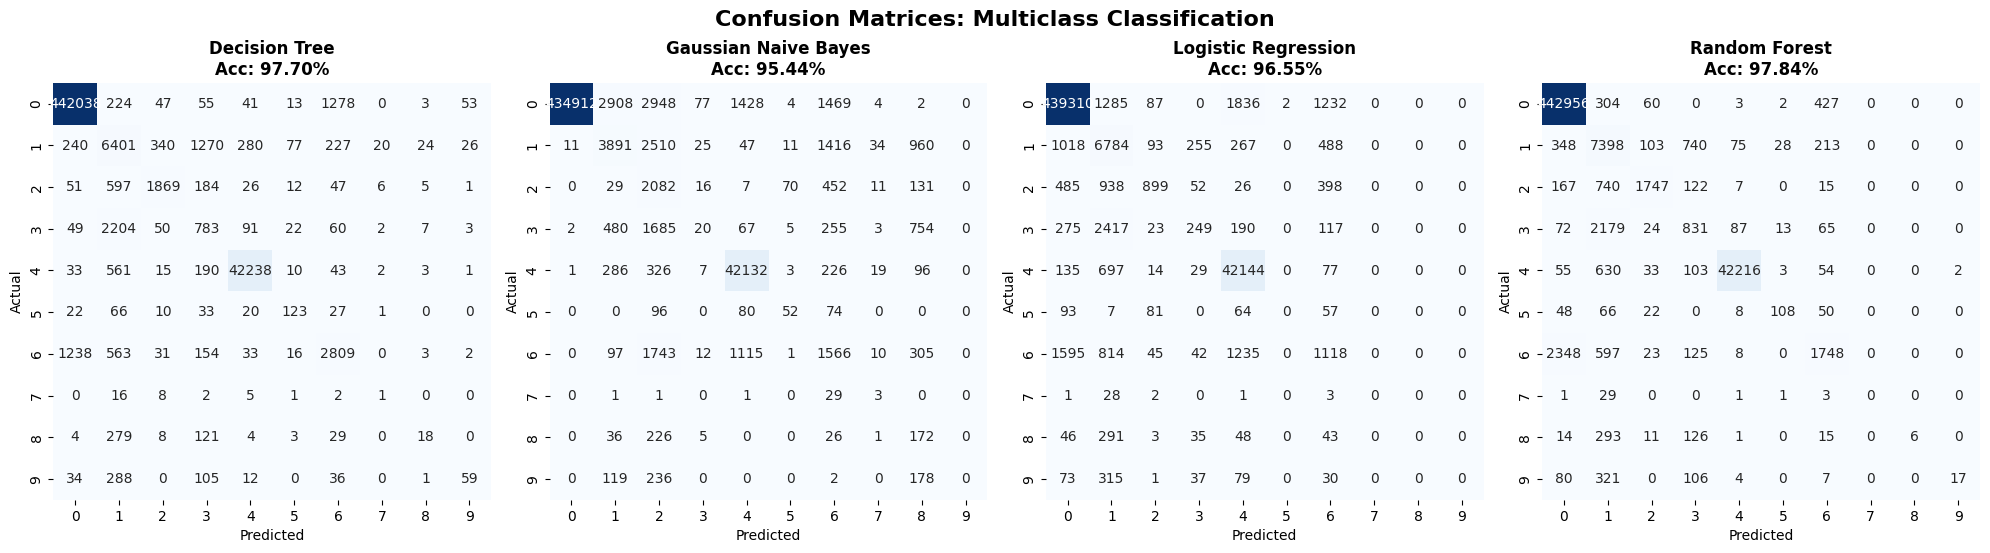

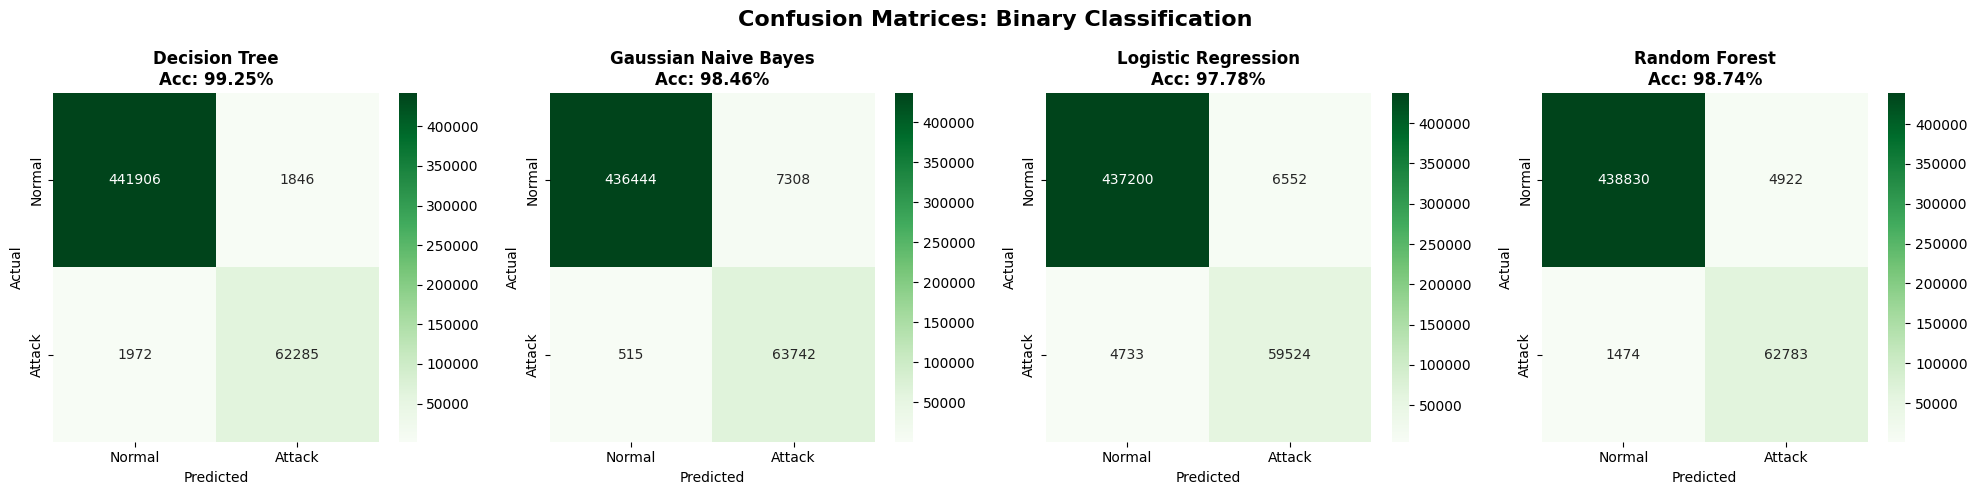

Confusion matrices saved


In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
import os
os.makedirs("visualizations", exist_ok=True)

print("\nGenerating Confusion Matrices...")

model_names = ['Decision_Tree', 'Gaussian_Naive_Bayes', 'Logistic_Regression', 'Random_Forest']
display_names = ['Decision Tree', 'Gaussian Naive Bayes', 'Logistic Regression', 'Random Forest']

fig, axes = plt.subplots(2, 4, figsize=(20, 10))
fig.suptitle('Confusion Matrices: Multiclass Classification', fontsize=16, fontweight='bold')

for idx, (model_name, display_name) in enumerate(zip(model_names, display_names)):
    model_path = f"models/final_classifier_multiclass_{model_name}.pkl"
    with open(model_path, 'rb') as f:
        model_data = pickle.load(f)
    
    cm = model_data['confusion_matrix']
    
    ax = axes[0, idx]
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=ax, cbar=False)
    ax.set_title(f'{display_name}\nAcc: {model_data["accuracy"]*100:.2f}%', fontweight='bold')
    ax.set_xlabel('Predicted')
    ax.set_ylabel('Actual')

fig.delaxes(axes[1, 0])
fig.delaxes(axes[1, 1])
fig.delaxes(axes[1, 2])
fig.delaxes(axes[1, 3])

plt.tight_layout()
plt.savefig('visualizations/confusion_matrices_multiclass.png', dpi=300, bbox_inches='tight')
plt.show()

fig, axes = plt.subplots(1, 4, figsize=(20, 5))
fig.suptitle('Confusion Matrices: Binary Classification', fontsize=16, fontweight='bold')

for idx, (model_name, display_name) in enumerate(zip(model_names, display_names)):
    model_path = f"models/final_classifier_binary_{model_name}.pkl"
    with open(model_path, 'rb') as f:
        model_data = pickle.load(f)
    
    cm = model_data['confusion_matrix']
    
    sns.heatmap(cm, annot=True, fmt='d', cmap='Greens', ax=axes[idx], 
                xticklabels=['Normal', 'Attack'], yticklabels=['Normal', 'Attack'])
    axes[idx].set_title(f'{display_name}\nAcc: {model_data["accuracy"]*100:.2f}%', fontweight='bold')
    axes[idx].set_xlabel('Predicted')
    axes[idx].set_ylabel('Actual')

plt.tight_layout()
plt.savefig('visualizations/confusion_matrices_binary.png', dpi=300, bbox_inches='tight')
plt.show()

print("Confusion matrices saved")

### ROC Curves

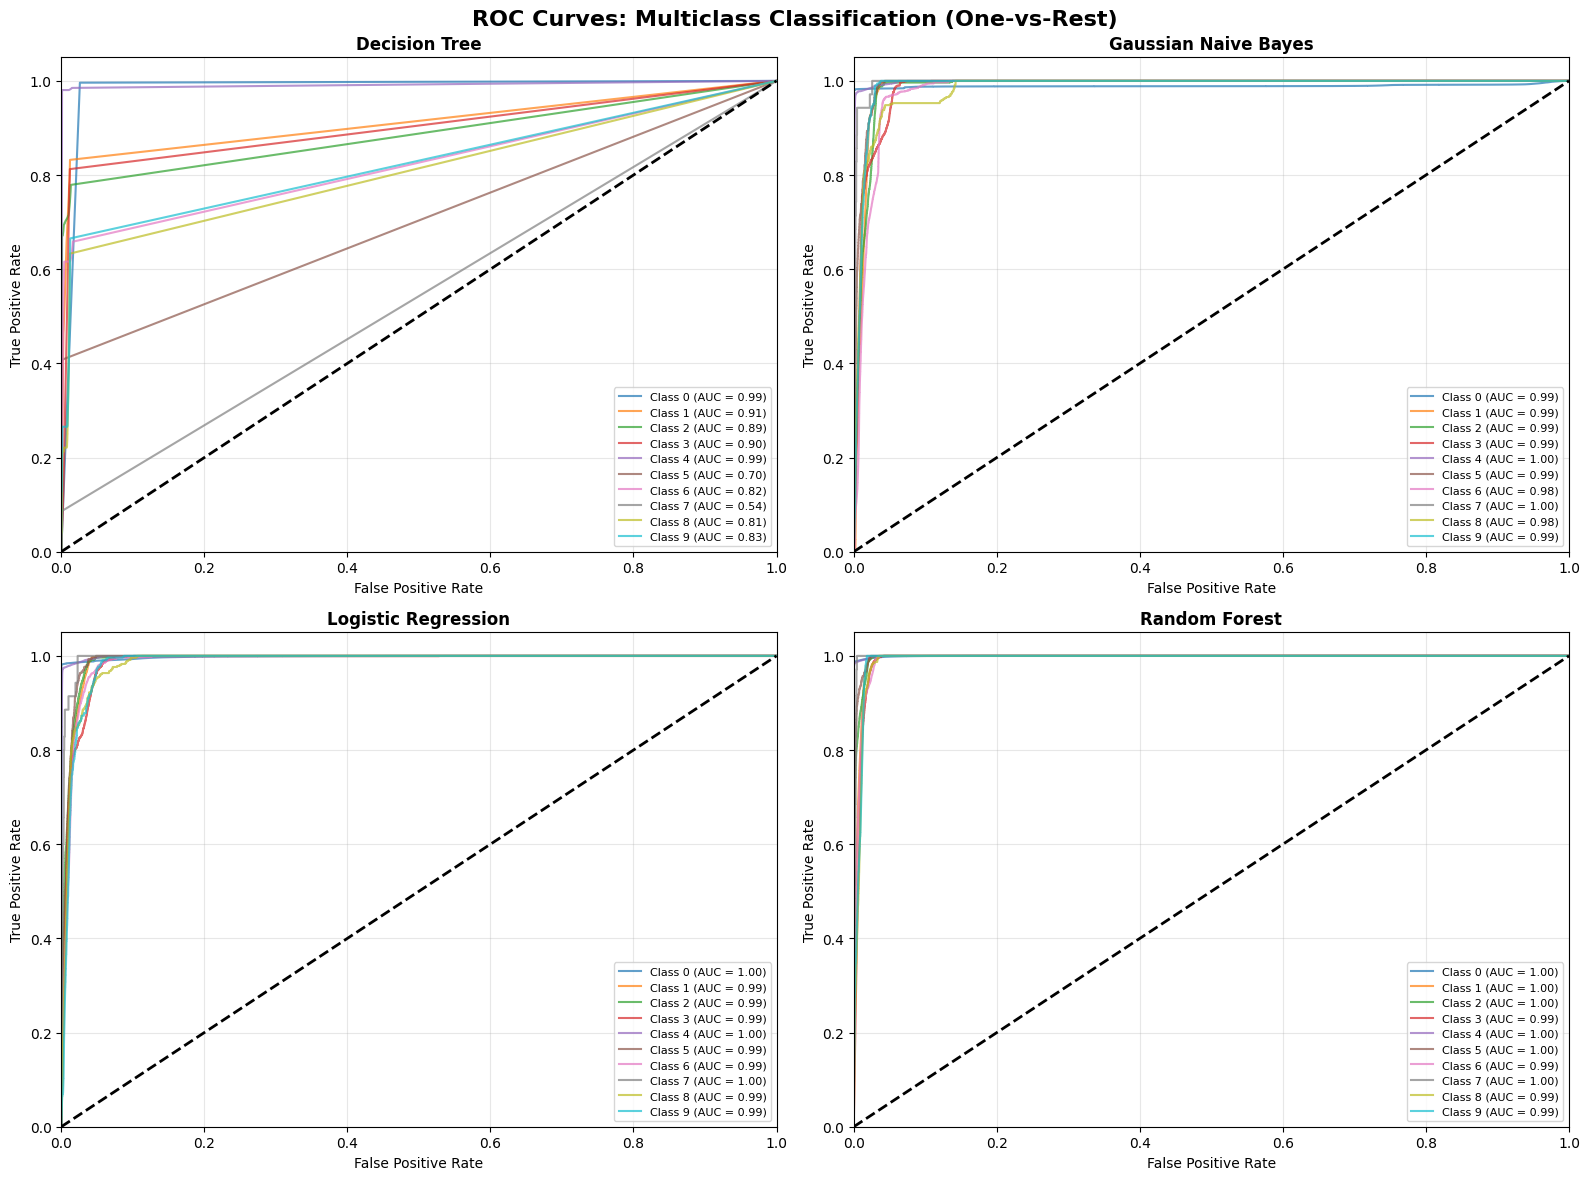

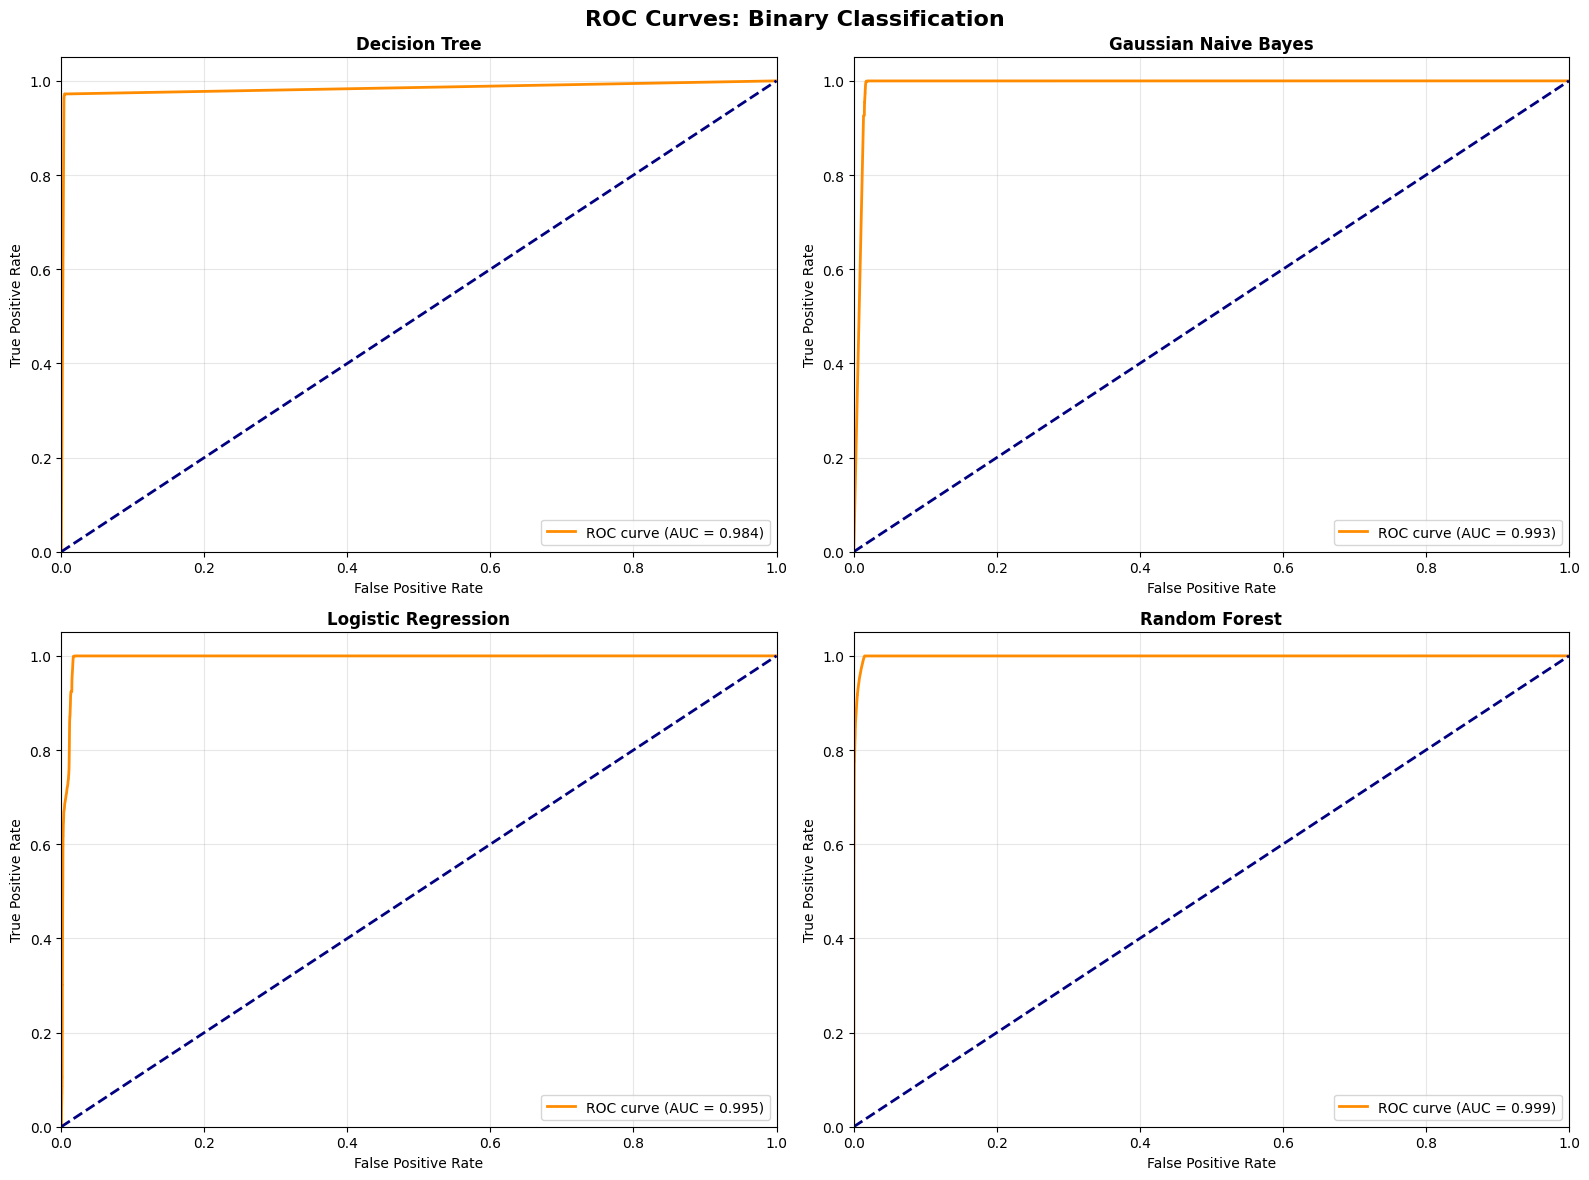

ROC curves saved


In [29]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize

labels_test = pd.read_csv("UNSW_FEIIDS_test_labels.csv")
y_test_multi = labels_test['attack_cat']
y_test_binary = labels_test['binary_label']

X_test_multi = pd.read_csv("UNSW_FEIIDS_test_engineered_multiclass.csv")
X_test_binary = pd.read_csv("UNSW_FEIIDS_test_engineered_binary.csv")

y_test_multi_bin = label_binarize(y_test_multi, classes=range(10))

fig, axes = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle('ROC Curves: Multiclass Classification (One-vs-Rest)', fontsize=16, fontweight='bold')

for idx, (model_name, display_name) in enumerate(zip(model_names, display_names)):
    ax = axes[idx // 2, idx % 2]
    
    model_path = f"models/final_classifier_multiclass_{model_name}.pkl"
    with open(model_path, 'rb') as f:
        model_data = pickle.load(f)
    
    clf = model_data['model']
    
    if hasattr(clf, "predict_proba"):
        y_score = clf.predict_proba(X_test_multi)
    else:
        y_score = clf.decision_function(X_test_multi)
        y_score = (y_score - y_score.min()) / (y_score.max() - y_score.min())
    
    for i in range(10):
        fpr, tpr, _ = roc_curve(y_test_multi_bin[:, i], y_score[:, i])
        roc_auc = auc(fpr, tpr)
        ax.plot(fpr, tpr, lw=1.5, alpha=0.7, label=f'Class {i} (AUC = {roc_auc:.2f})')
    
    ax.plot([0, 1], [0, 1], 'k--', lw=2)
    ax.set_xlim([0.0, 1.0])
    ax.set_ylim([0.0, 1.05])
    ax.set_xlabel('False Positive Rate')
    ax.set_ylabel('True Positive Rate')
    ax.set_title(f'{display_name}', fontweight='bold')
    ax.legend(loc="lower right", fontsize=8)
    ax.grid(alpha=0.3)

plt.tight_layout()
plt.savefig('visualizations/roc_curves_multiclass.png', dpi=300, bbox_inches='tight')
plt.show()

fig, axes = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle('ROC Curves: Binary Classification', fontsize=16, fontweight='bold')

for idx, (model_name, display_name) in enumerate(zip(model_names, display_names)):
    ax = axes[idx // 2, idx % 2]
    
    model_path = f"models/final_classifier_binary_{model_name}.pkl"
    with open(model_path, 'rb') as f:
        model_data = pickle.load(f)
    
    clf = model_data['model']
    
    if hasattr(clf, "predict_proba"):
        y_score = clf.predict_proba(X_test_binary)[:, 1]
    else:
        y_score = clf.decision_function(X_test_binary)
        y_score = (y_score - y_score.min()) / (y_score.max() - y_score.min())
    
    fpr, tpr, _ = roc_curve(y_test_binary, y_score)
    roc_auc = auc(fpr, tpr)
    
    ax.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.3f})')
    ax.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    ax.set_xlim([0.0, 1.0])
    ax.set_ylim([0.0, 1.05])
    ax.set_xlabel('False Positive Rate')
    ax.set_ylabel('True Positive Rate')
    ax.set_title(f'{display_name}', fontweight='bold')
    ax.legend(loc="lower right")
    ax.grid(alpha=0.3)

plt.tight_layout()
plt.savefig('visualizations/roc_curves_binary.png', dpi=300, bbox_inches='tight')
plt.show()

print("ROC curves saved")

### Performance Comparison Bar Charts

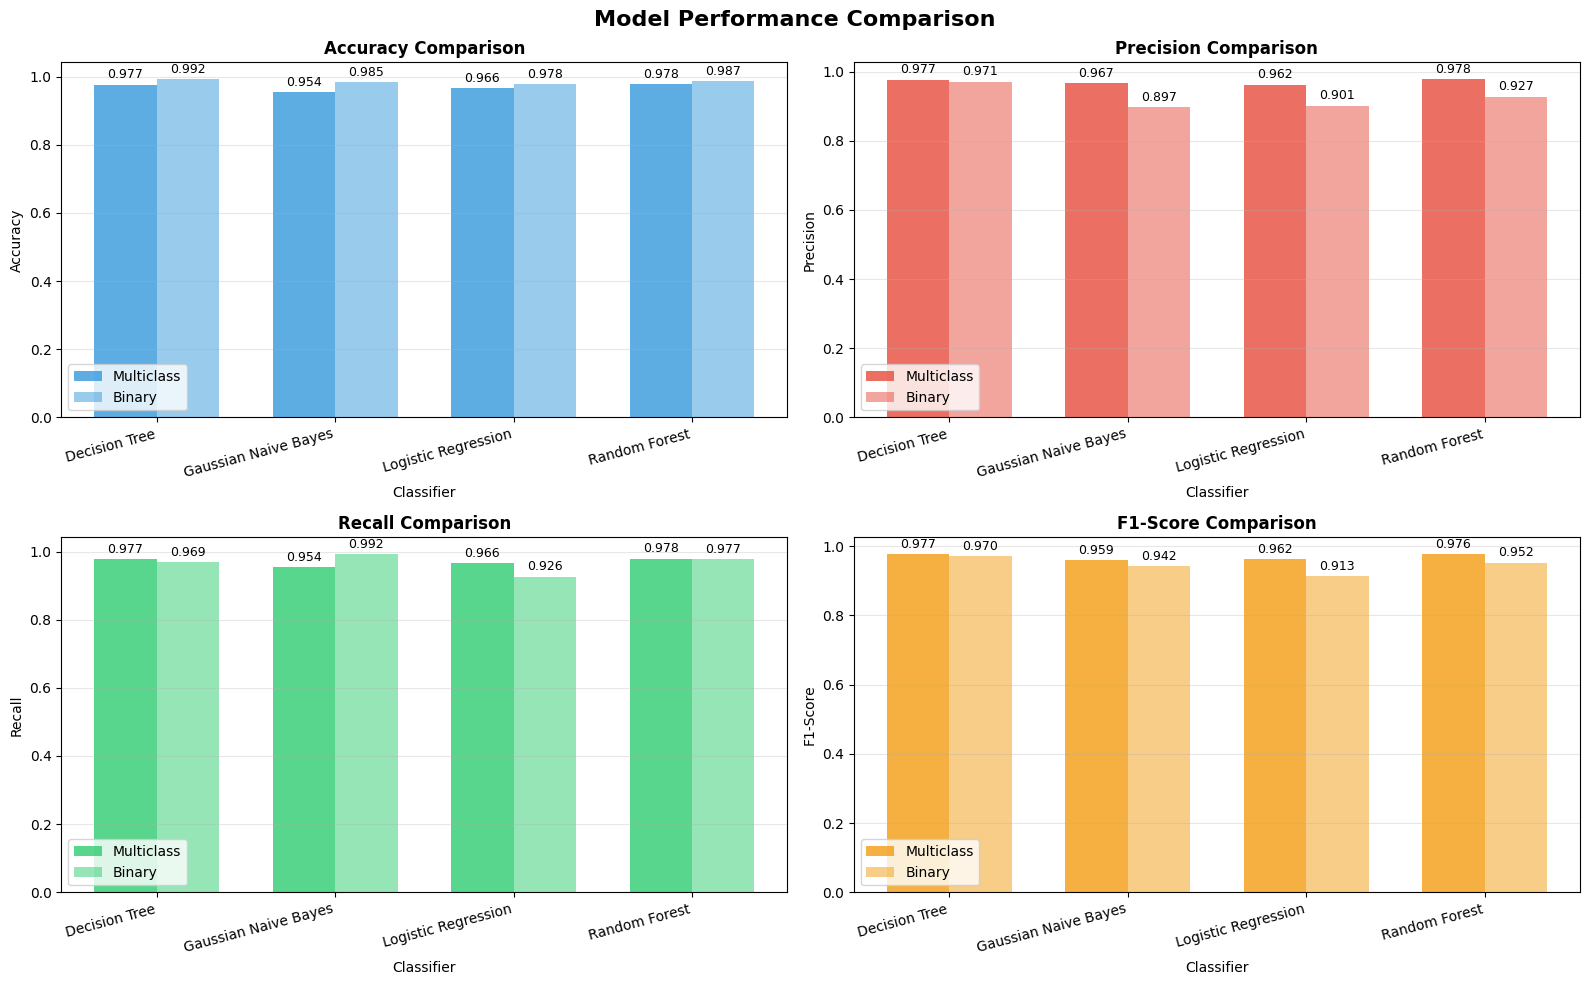

Performance comparison saved


In [30]:
results_multi = pd.read_csv("models/results_multiclass_classification.csv")
results_binary = pd.read_csv("models/results_binary_classification.csv")

fig, axes = plt.subplots(2, 2, figsize=(16, 10))
fig.suptitle('Model Performance Comparison', fontsize=16, fontweight='bold')

metrics = ['Accuracy', 'Precision', 'Recall', 'F1-Score']
colors = ['#3498db', '#e74c3c', '#2ecc71', '#f39c12']

for idx, metric in enumerate(metrics):
    ax = axes[idx // 2, idx % 2]
    
    x = np.arange(len(results_multi))
    width = 0.35
    
    multi_values = results_multi[metric].values
    binary_values = results_binary[metric].values
    
    ax.bar(x - width/2, multi_values, width, label='Multiclass', color=colors[idx], alpha=0.8)
    ax.bar(x + width/2, binary_values, width, label='Binary', color=colors[idx], alpha=0.5)
    
    ax.set_xlabel('Classifier')
    ax.set_ylabel(metric)
    ax.set_title(f'{metric} Comparison', fontweight='bold')
    ax.set_xticks(x)
    ax.set_xticklabels(results_multi['Classifier'], rotation=15, ha='right')
    ax.legend()
    ax.grid(axis='y', alpha=0.3)
    
    for i, v in enumerate(multi_values):
        ax.text(i - width/2, v + 0.01, f'{v:.3f}', ha='center', va='bottom', fontsize=9)
    for i, v in enumerate(binary_values):
        ax.text(i + width/2, v + 0.01, f'{v:.3f}', ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.savefig('visualizations/performance_comparison.png', dpi=300, bbox_inches='tight')
plt.show()

print("Performance comparison saved")

### Precision Recall Curve


Generating Multiclass PR Curve (Random Forest)...


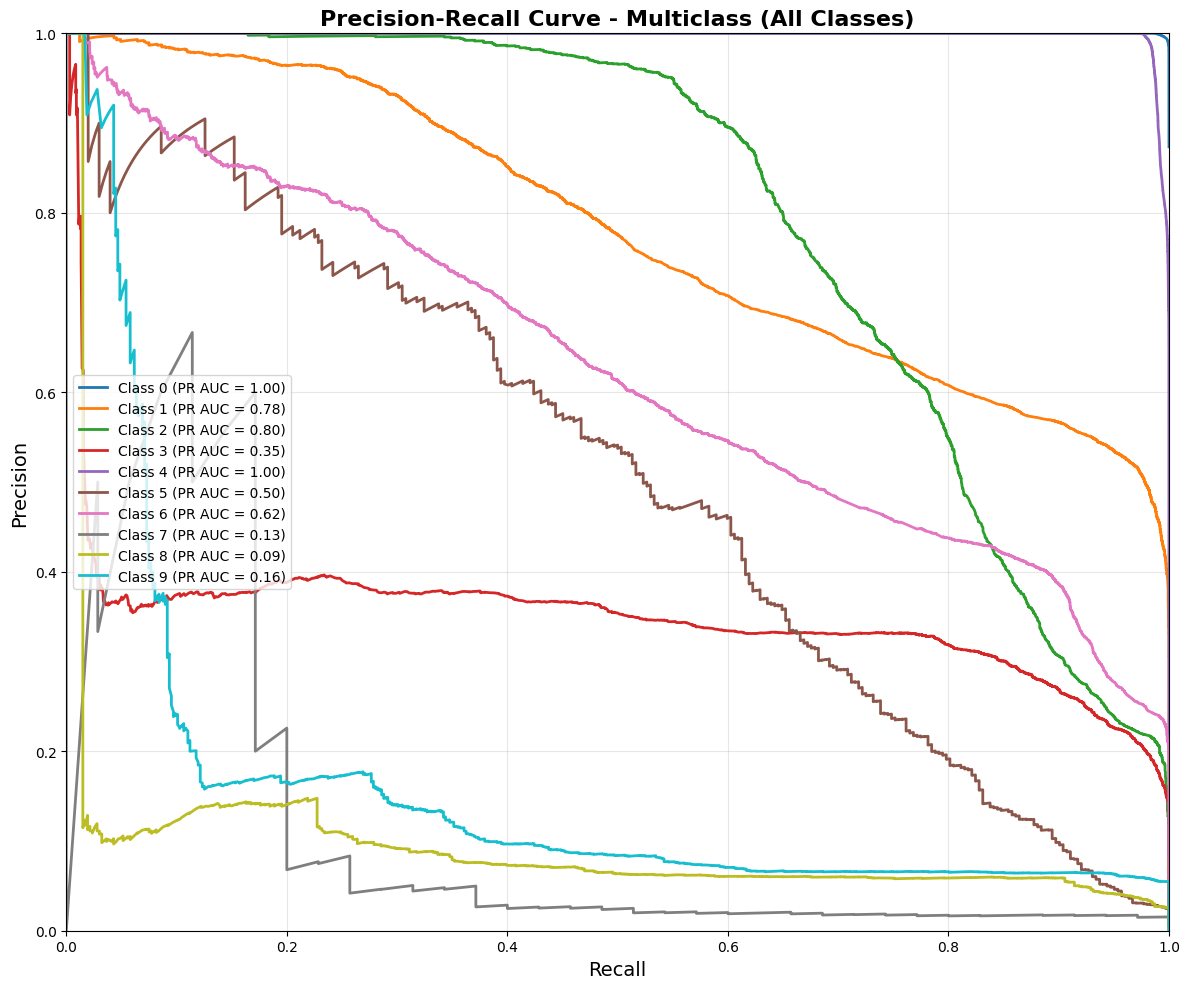


Multiclass PR AUC Scores:
  Class 0 (Normal         ): 1.0000
  Class 1 (Exploits       ): 0.7788
  Class 2 (Reconnaissance ): 0.8002
  Class 3 (DoS            ): 0.3490
  Class 4 (Generic        ): 0.9978
  Class 5 (Shellcode      ): 0.5034
  Class 6 (Fuzzers        ): 0.6250
  Class 7 (Worms          ): 0.1271
  Class 8 (Backdoor       ): 0.0931
  Class 9 (Analysis       ): 0.1591


Generating Binary PR Curve (Random Forest)...


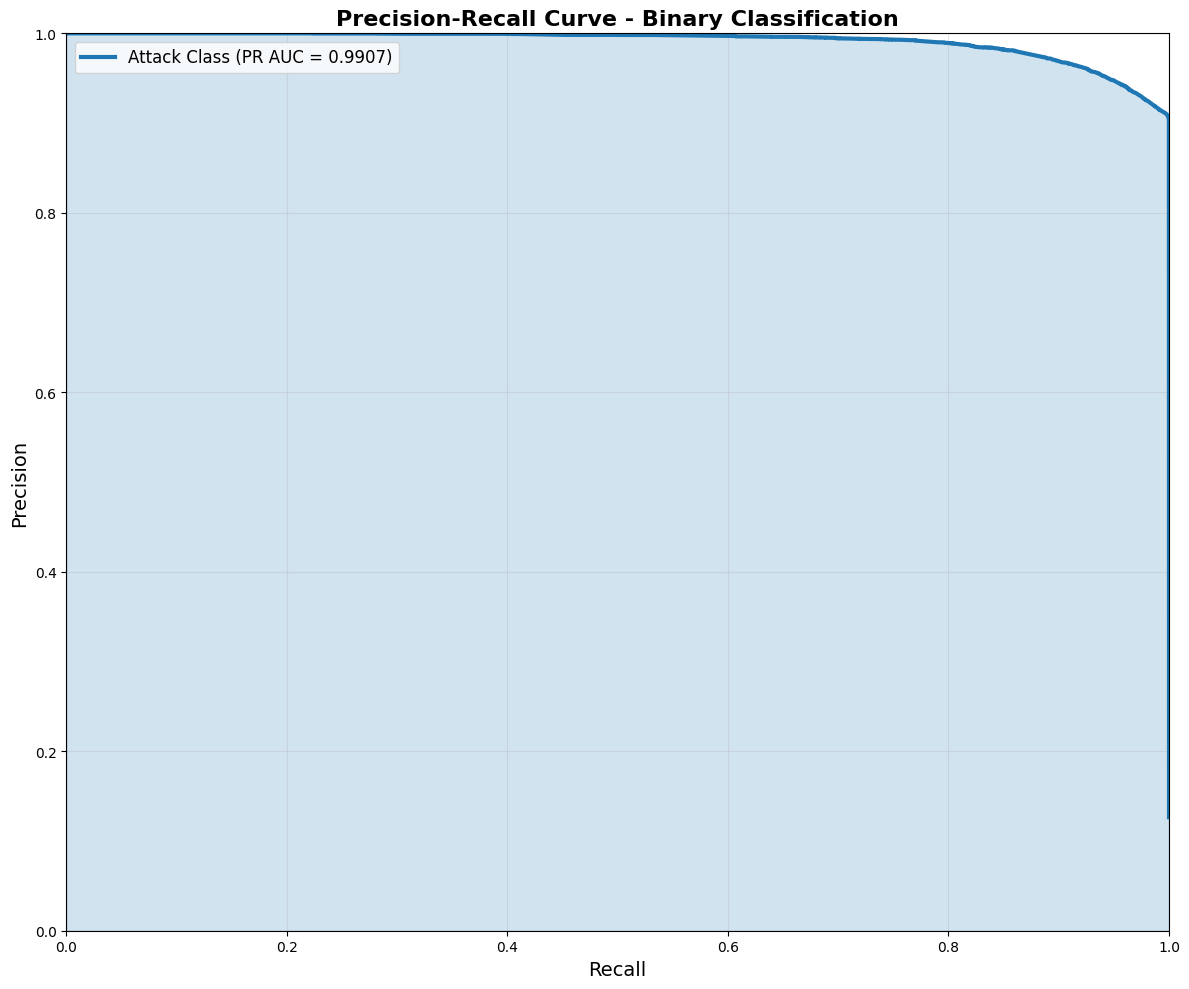


Binary PR AUC Score: 0.9907

PR CURVE GENERATION COMPLETE

Files saved:
  - visualizations/pr_curve_multiclass.png
  - visualizations/pr_curve_binary.png


In [39]:
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve, average_precision_score
from sklearn.preprocessing import label_binarize
import numpy as np
import pandas as pd
import pickle

# Load test data
labels_test = pd.read_csv("UNSW_FEIIDS_test_labels.csv")
X_test_multi = pd.read_csv("UNSW_FEIIDS_test_engineered_multiclass.csv")
X_test_binary = pd.read_csv("UNSW_FEIIDS_test_engineered_binary.csv")

y_test_multi = labels_test['attack_cat']
y_test_binary = labels_test['binary_label']
y_test_multi_bin = label_binarize(y_test_multi, classes=range(10))

class_names = ['Normal', 'Exploits', 'Reconnaissance', 'DoS', 'Generic', 
               'Shellcode', 'Fuzzers', 'Worms', 'Backdoor', 'Analysis']

colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', 
          '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']

# ============================================================================
# MULTICLASS PR CURVE (ALL CLASSES IN ONE PLOT)
# ============================================================================

print("\nGenerating Multiclass PR Curve (Random Forest)...")

model_path = "models/final_classifier_multiclass_Random_Forest.pkl"
with open(model_path, 'rb') as f:
    model_data = pickle.load(f)

clf = model_data['model']

if hasattr(clf, "predict_proba"):
    y_scores = clf.predict_proba(X_test_multi)
else:
    decision = clf.decision_function(X_test_multi)
    y_scores = np.exp(decision) / np.sum(np.exp(decision), axis=1, keepdims=True)

fig, ax = plt.subplots(figsize=(12, 10))

for class_id in range(10):
    precision, recall, _ = precision_recall_curve(y_test_multi_bin[:, class_id], 
                                                   y_scores[:, class_id])
    pr_auc = average_precision_score(y_test_multi_bin[:, class_id], 
                                      y_scores[:, class_id])
    ax.plot(recall, precision, lw=2, color=colors[class_id],
            label=f'Class {class_id} (PR AUC = {pr_auc:.2f})')

ax.set_xlim([0.0, 1.0])
ax.set_ylim([0.0, 1.0])
ax.set_xlabel('Recall', fontsize=14)
ax.set_ylabel('Precision', fontsize=14)
ax.set_title('Precision-Recall Curve - Multiclass (All Classes)', fontsize=16, fontweight='bold')
ax.legend(loc='best', fontsize=10)
ax.grid(alpha=0.3)

plt.tight_layout()
plt.savefig('visualizations/pr_curve_multiclass.png', dpi=300, bbox_inches='tight')
plt.show()

print("\nMulticlass PR AUC Scores:")
for class_id in range(10):
    pr_auc = average_precision_score(y_test_multi_bin[:, class_id], y_scores[:, class_id])
    print(f"  Class {class_id} ({class_names[class_id]:<15s}): {pr_auc:.4f}")

# ============================================================================
# BINARY PR CURVE
# ============================================================================

print("\n\nGenerating Binary PR Curve (Random Forest)...")

model_path = "models/final_classifier_binary_Random_Forest.pkl"
with open(model_path, 'rb') as f:
    model_data = pickle.load(f)

clf = model_data['model']

if hasattr(clf, "predict_proba"):
    y_scores_binary = clf.predict_proba(X_test_binary)[:, 1]
else:
    y_scores_binary = clf.decision_function(X_test_binary)
    y_scores_binary = (y_scores_binary - y_scores_binary.min()) / (y_scores_binary.max() - y_scores_binary.min())

precision, recall, _ = precision_recall_curve(y_test_binary, y_scores_binary)
pr_auc = average_precision_score(y_test_binary, y_scores_binary)

fig, ax = plt.subplots(figsize=(12, 10))

ax.plot(recall, precision, lw=3, color='#1f77b4', label=f'Attack Class (PR AUC = {pr_auc:.4f})')
ax.fill_between(recall, precision, alpha=0.2, color='#1f77b4')

ax.set_xlim([0.0, 1.0])
ax.set_ylim([0.0, 1.0])
ax.set_xlabel('Recall', fontsize=14)
ax.set_ylabel('Precision', fontsize=14)
ax.set_title('Precision-Recall Curve - Binary Classification', fontsize=16, fontweight='bold')
ax.legend(loc='best', fontsize=12)
ax.grid(alpha=0.3)

plt.tight_layout()
plt.savefig('visualizations/pr_curve_binary.png', dpi=300, bbox_inches='tight')
plt.show()

print(f"\nBinary PR AUC Score: {pr_auc:.4f}")

print("\n" + "="*80)
print("PR CURVE GENERATION COMPLETE")
print("="*80)
print("\nFiles saved:")
print("  - visualizations/pr_curve_multiclass.png")
print("  - visualizations/pr_curve_binary.png")


## **Evaluation and Comparison with Base Paper**

### Load Trained Models

In [31]:
import pickle
import os

print("="*80)
print("MODEL EVALUATION AND COMPARISON")
print("="*80)

model_names = ['Decision_Tree', 'Gaussian_Naive_Bayes', 'Logistic_Regression', 'Random_Forest']
display_names = ['Decision Tree', 'Gaussian Naive Bayes', 'Logistic Regression', 'Random Forest']

multiclass_results = []
print("\nLoading multiclass models...")
for model_name, display_name in zip(model_names, display_names):
    model_path = f"models/final_classifier_multiclass_{model_name}.pkl"
    if os.path.exists(model_path):
        with open(model_path, 'rb') as f:
            model_data = pickle.load(f)
        multiclass_results.append({
            'Classifier': display_name,
            'Accuracy': model_data['accuracy'],
            'Train_Time': model_data['train_time'],
            'Test_Time': model_data['test_time'],
            'Precision': model_data['precision'],
            'Recall': model_data['recall'],
            'F1_Score': model_data['f1_score']
        })
        print(f"  {display_name}")

binary_results = []
print("\nLoading binary models...")
for model_name, display_name in zip(model_names, display_names):
    model_path = f"models/final_classifier_binary_{model_name}.pkl"
    if os.path.exists(model_path):
        with open(model_path, 'rb') as f:
            model_data = pickle.load(f)
        binary_results.append({
            'Classifier': display_name,
            'Accuracy': model_data['accuracy'],
            'Train_Time': model_data['train_time'],
            'Test_Time': model_data['test_time'],
            'Precision': model_data['precision'],
            'Recall': model_data['recall'],
            'F1_Score': model_data['f1_score']
        })
        print(f"  {display_name}")


MODEL EVALUATION AND COMPARISON

Loading multiclass models...
  Decision Tree
  Gaussian Naive Bayes
  Logistic Regression
  Random Forest

Loading binary models...
  Decision Tree
  Gaussian Naive Bayes
  Logistic Regression
  Random Forest


### Results Tables

In [32]:
print("\n" + "="*80)
print("MULTICLASS CLASSIFICATION RESULTS")
print("="*80)

print(f"\n{'Classifier':<30} {'Accuracy':<12} {'Train (s)':<12} {'Test (s)':<12} {'Precision':<12} {'Recall':<12} {'F1-Score':<12}")
print("-"*105)

for result in multiclass_results:
    print(f"{result['Classifier']:<30} {result['Accuracy']:<12.4f} {result['Train_Time']:<12.4f} {result['Test_Time']:<12.4f} {result['Precision']:<12.2f} {result['Recall']:<12.2f} {result['F1_Score']:<12.2f}")

print("\n" + "="*80)
print("BINARY CLASSIFICATION RESULTS")
print("="*80)

print(f"\n{'Classifier':<30} {'Accuracy':<12} {'Train (s)':<12} {'Test (s)':<12} {'Precision':<12} {'Recall':<12} {'F1-Score':<12}")
print("-"*105)

for result in binary_results:
    print(f"{result['Classifier']:<30} {result['Accuracy']:<12.4f} {result['Train_Time']:<12.4f} {result['Test_Time']:<12.4f} {result['Precision']:<12.2f} {result['Recall']:<12.2f} {result['F1_Score']:<12.2f}")



MULTICLASS CLASSIFICATION RESULTS

Classifier                     Accuracy     Train (s)    Test (s)     Precision    Recall       F1-Score    
---------------------------------------------------------------------------------------------------------
Decision Tree                  0.9770       23.0655      0.0551       0.98         0.98         0.98        
Gaussian Naive Bayes           0.9544       0.7427       0.7129       0.97         0.95         0.96        
Logistic Regression            0.9655       68.9340      0.0624       0.96         0.97         0.96        
Random Forest                  0.9784       150.4871     1.8427       0.98         0.98         0.98        

BINARY CLASSIFICATION RESULTS

Classifier                     Accuracy     Train (s)    Test (s)     Precision    Recall       F1-Score    
---------------------------------------------------------------------------------------------------------
Decision Tree                  0.9925       4.4148       0.0337   

### Comparison with Paper Results

In [33]:
paper_multiclass = {
    'Decision Tree': 0.9562,
    'Gaussian Naive Bayes': 0.9493,
    'Logistic Regression': 0.9622,
    'Random Forest': 0.9703
}

paper_binary = {
    'Decision Tree': 0.9743,
    'Gaussian Naive Bayes': 0.9800,
    'Logistic Regression': 0.9826,
    'Random Forest': 0.9880
}

print("\nMulticlass Comparison:")
print("-"*80)
print(f"{'Classifier':<30} {'Your Result':<15} {'Paper Result':<15} {'Difference':<15} {'Status':<15}")
print("-"*80)

for result in multiclass_results:
    clf = result['Classifier']
    your_acc = result['Accuracy']
    paper_acc = paper_multiclass[clf]
    diff = your_acc - paper_acc
    status = "BETTER" if diff > 0.001 else ("LOWER" if diff < -0.001 else "SAME")
    print(f"{clf:<30} {your_acc:<15.4f} {paper_acc:<15.4f} {diff:>+14.4f} {status:<15}")

print("\nBinary Comparison:")
print("-"*80)
print(f"{'Classifier':<30} {'Your Result':<15} {'Paper Result':<15} {'Difference':<15} {'Status':<15}")
print("-"*80)

for result in binary_results:
    clf = result['Classifier']
    your_acc = result['Accuracy']
    paper_acc = paper_binary[clf]
    diff = your_acc - paper_acc
    status = "BETTER" if diff > 0.001 else ("LOWER" if diff < -0.001 else "SAME")
    print(f"{clf:<30} {your_acc:<15.4f} {paper_acc:<15.4f} {diff:>+14.4f} {status:<15}")



Multiclass Comparison:
--------------------------------------------------------------------------------
Classifier                     Your Result     Paper Result    Difference      Status         
--------------------------------------------------------------------------------
Decision Tree                  0.9770          0.9562                 +0.0208 BETTER         
Gaussian Naive Bayes           0.9544          0.9493                 +0.0051 BETTER         
Logistic Regression            0.9655          0.9622                 +0.0033 BETTER         
Random Forest                  0.9784          0.9703                 +0.0081 BETTER         

Binary Comparison:
--------------------------------------------------------------------------------
Classifier                     Your Result     Paper Result    Difference      Status         
--------------------------------------------------------------------------------
Decision Tree                  0.9925          0.9743             

### Best Models Summary

In [35]:
best_multi = max(multiclass_results, key=lambda x: x['Accuracy'])
print(f"\nBest Multiclass: {best_multi['Classifier']}")
print(f"  Accuracy:   {best_multi['Accuracy']:.4f} ({best_multi['Accuracy']*100:.2f}%)")
print(f"  Precision:  {best_multi['Precision']:.2f}")
print(f"  Recall:     {best_multi['Recall']:.2f}")
print(f"  F1-Score:   {best_multi['F1_Score']:.2f}")
print(f"  Train Time: {best_multi['Train_Time']:.2f}s")
print(f"  Test Time:  {best_multi['Test_Time']:.4f}s")

best_binary = max(binary_results, key=lambda x: x['Accuracy'])
print(f"\nBest Binary: {best_binary['Classifier']}")
print(f"  Accuracy:   {best_binary['Accuracy']:.4f} ({best_binary['Accuracy']*100:.2f}%)")
print(f"  Precision:  {best_binary['Precision']:.2f}")
print(f"  Recall:     {best_binary['Recall']:.2f}")
print(f"  F1-Score:   {best_binary['F1_Score']:.2f}")
print(f"  Train Time: {best_binary['Train_Time']:.2f}s")
print(f"  Test Time:  {best_binary['Test_Time']:.4f}s")

your_rf_multi = next(r for r in multiclass_results if r['Classifier'] == 'Random Forest')
your_rf_binary = next(r for r in binary_results if r['Classifier'] == 'Random Forest')

print("\n" + "="*80)
print("SUMMARY")
print("="*80)
print(f"\nPaper's Best:")
print(f"  Multiclass: Random Forest - 97.03%")
print(f"  Binary:     Random Forest - 98.80%")

print(f"\nOur Results:")
print(f"  Multiclass: {best_multi['Classifier']} - {best_multi['Accuracy']*100:.2f}%")
print(f"  Binary:     {best_binary['Classifier']} - {best_binary['Accuracy']*100:.2f}%")

print(f"\nOur Random Forest:")
print(f"  Multiclass: {your_rf_multi['Accuracy']:.4f} (Diff: {your_rf_multi['Accuracy']-0.9703:+.4f})")
print(f"  Binary:     {your_rf_binary['Accuracy']:.4f} (Diff: {your_rf_binary['Accuracy']-0.9880:+.4f})")

print("\n" + "="*80)
print("EVALUATION COMPLETE")
print("="*80)



Best Multiclass: Random Forest
  Accuracy:   0.9784 (97.84%)
  Precision:  0.98
  Recall:     0.98
  F1-Score:   0.98
  Train Time: 150.49s
  Test Time:  1.8427s

Best Binary: Decision Tree
  Accuracy:   0.9925 (99.25%)
  Precision:  0.97
  Recall:     0.97
  F1-Score:   0.97
  Train Time: 4.41s
  Test Time:  0.0337s

SUMMARY

Paper's Best:
  Multiclass: Random Forest - 97.03%
  Binary:     Random Forest - 98.80%

Our Results:
  Multiclass: Random Forest - 97.84%
  Binary:     Decision Tree - 99.25%

Our Random Forest:
  Multiclass: 0.9784 (Diff: +0.0081)
  Binary:     0.9874 (Diff: -0.0006)

EVALUATION COMPLETE
